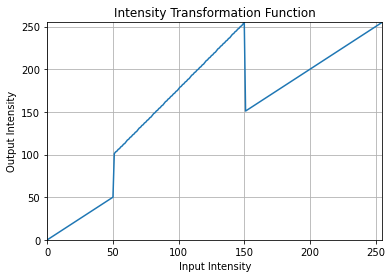

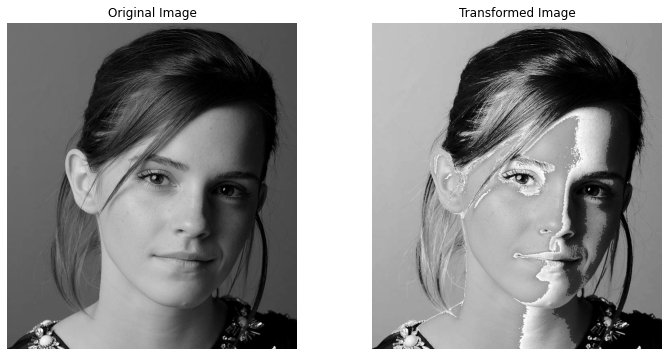

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define control points for intensity windowing based on the given image
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

# Create piecewise linear transformation
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0] + 1).astype('uint8')
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0] + 1).astype('uint8')
t5 = np.linspace(c[3, 1], 255, 255 - c[3, 0] + 1).astype('uint8')  # Adjust to include 255

# Concatenate the segments to form the transformation function
transform = np.concatenate((t1, t2[1:], t3[1:], t4[1:], t5[1:]), axis=0)

# Ensure transform has exactly 256 values
if transform.size != 256:
    raise ValueError(f"Transform must have exactly 256 values, but it has {transform.size}")

# Plot the transformation function
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
plt.title('Intensity Transformation Function')
plt.grid(True)
plt.show()

# Read the original image in grayscale
img_orig = cv.imread('a1images/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if img_orig is None:
    raise FileNotFoundError("Image file not found. Check the path.")

# Apply the transformation function using LUT (Look-Up Table)
image_transformed = cv.LUT(img_orig, transform)

# Display the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Transformed image
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')

plt.show()
